In [1]:
import yfinance as yf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=yf.download('TSLA',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200
2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100
2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400


In [3]:
df['SMA']=df.Close.rolling(window=20).mean()

In [4]:
df['stddev']=df.Close.rolling(window=20).std()

In [5]:
df['Upper']=df.SMA+2*df.stddev
df['Lower']=df.SMA-2*df.stddev

In [6]:
df['Buy_signal']=np.where(df.Lower>df.Close,True,False)

In [7]:
df['Sell_signal']=np.where(df.Upper<df.Close,True,False)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,False,False
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,NaN,NaN,False,False
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,NaN,NaN,False,False
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,NaN,NaN,False,False
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200,193.409499,17.217483,227.844466,158.974533,False,False
2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,191.074000,15.418128,221.910256,160.237744,False,False
2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,189.417999,12.824087,215.066173,163.769826,False,False


In [9]:
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,,
2010-07-27,1.394000,1.412000,1.350667,1.370000,1.370000,9295500,1.324767,0.153098,1.630962,1.018572,False,False
2010-07-28,1.370000,1.393333,1.367333,1.381333,1.381333,7008000,1.314200,0.140401,1.595001,1.033399,False,False
2010-07-29,1.384667,1.392000,1.333333,1.356667,1.356667,9240000,1.302600,0.125303,1.553205,1.051995,False,False
2010-07-30,1.346667,1.362667,1.303333,1.329333,1.329333,6403500,1.295867,0.119665,1.535196,1.056537,False,False
2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500,1.301600,0.121596,1.544792,1.058408,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200,193.409499,17.217483,227.844466,158.974533,False,False
2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,191.074000,15.418128,221.910256,160.237744,False,False
2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,189.417999,12.824087,215.066173,163.769826,False,False


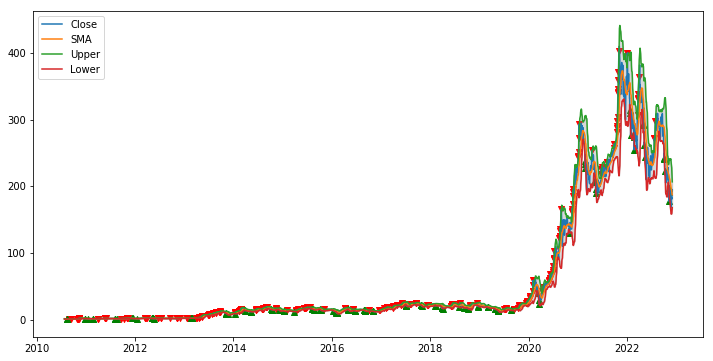

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.index[df.Sell_signal],df[df.Sell_signal].Close,marker='v',color='r')
plt.scatter(df.index[df.Buy_signal],df[df.Buy_signal].Close,marker='^',color='g')
plt.fill_between(df.index,df.Upper,df.Lower,color='gray',alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

In [11]:
buy=[]
sell=[]
open_pos=False

for i in range(len(df)):
    if df.Lower[i]>df.Close[i]:
        if open_pos==False:
            buy.append(i)
            open_pos=True
    elif df.Upper[i]<df.Close[i]:
        if open_pos:
            sell.append(i)
            open_pos=False
sell

[27,
 172,
 289,
 410,
 480,
 673,
 873,
 978,
 1082,
 1138,
 1182,
 1329,
 1432,
 1476,
 1558,
 1613,
 1769,
 1858,
 1979,
 2019,
 2078,
 2249,
 2297,
 2444,
 2598,
 2696,
 2746,
 2933,
 3017]

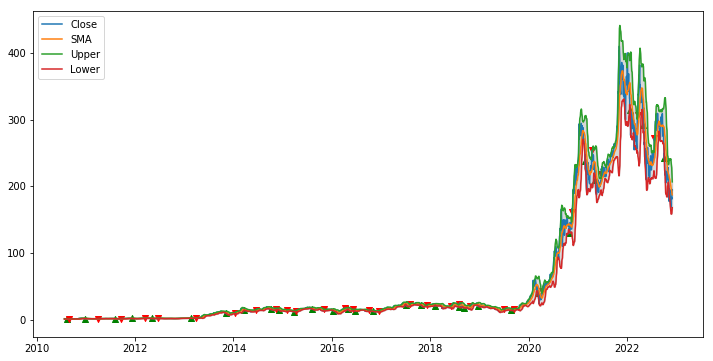

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.iloc[buy].index,df.iloc[buy].Close,marker='^',color='g')
plt.scatter(df.iloc[sell].index,df.iloc[sell].Close,marker='v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='gray',alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

In [13]:
merged=pd.concat([df.iloc[buy].Close,df.iloc[sell].Close],axis=1)
merged

,Close,Close
Date,,
2010-08-11,1.193333,NaN
2010-09-02,NaN,1.404000
2010-12-27,1.703333,NaN
2011-03-31,NaN,1.850000
2011-08-04,1.650000,NaN
2011-09-16,NaN,1.720000
2011-12-13,1.963333,NaN
2012-03-12,NaN,2.400667
2012-05-08,2.012667,NaN


In [14]:
merged.columns=['Buy','Sell']

In [15]:
merged

,Buy,Sell
Date,,
2010-08-11,1.193333,NaN
2010-09-02,NaN,1.404000
2010-12-27,1.703333,NaN
2011-03-31,NaN,1.850000
2011-08-04,1.650000,NaN
2011-09-16,NaN,1.720000
2011-12-13,1.963333,NaN
2012-03-12,NaN,2.400667
2012-05-08,2.012667,NaN


In [16]:
totalprofit=merged.shift(-1).Sell-merged.Buy

In [17]:
totalprofit

Date
2010-08-11     0.210667
2010-09-02          NaN
2010-12-27     0.146667
2011-03-31          NaN
2011-08-04     0.070000
2011-09-16          NaN
2011-12-13     0.437334
2012-03-12          NaN
2012-05-08     0.239333
2012-06-20          NaN
2013-02-21     0.584667
2013-04-01          NaN
2013-11-06     0.674000
2014-01-14          NaN
2014-03-24     0.296000
2014-06-16          NaN
2014-10-10     0.944667
2014-11-11          NaN
2014-12-08     0.266666
2015-02-03          NaN
2015-03-27     1.511334
2015-04-08          NaN
2015-08-06    -0.966666
2015-11-04          NaN
2016-01-13     3.677334
2016-04-05          NaN
2016-04-29    -0.561334
2016-06-07          NaN
2016-06-22     1.136000
2016-10-03          NaN
2016-11-01     1.200001
2016-12-20          NaN
2017-07-05     1.988001
2017-08-04          NaN
2017-10-25     0.204666
2017-12-11          NaN
2018-02-08     0.284666
2018-06-06          NaN
2018-07-30     3.958000
2018-08-02          NaN
2018-09-07     3.441334
2018-10-25 

In [18]:
relprofits=(merged.shift(-1).Sell-merged.Buy)/merged.Buy

In [19]:
relprofits

Date
2010-08-11    0.176537
2010-09-02         NaN
2010-12-27    0.086106
2011-03-31         NaN
2011-08-04    0.042424
2011-09-16         NaN
2011-12-13    0.222751
2012-03-12         NaN
2012-05-08    0.118913
2012-06-20         NaN
2013-02-21    0.249431
2013-04-01         NaN
2013-11-06    0.066883
2014-01-14         NaN
2014-03-24    0.020166
2014-06-16         NaN
2014-10-10    0.059812
2014-11-11         NaN
2014-12-08    0.018660
2015-02-03         NaN
2015-03-27    0.122541
2015-04-08         NaN
2015-08-06   -0.058912
2015-11-04         NaN
2016-01-13    0.275373
2016-04-05         NaN
2016-04-29   -0.034973
2016-06-07         NaN
2016-06-22    0.086647
2016-10-03         NaN
2016-11-01    0.094345
2016-12-20         NaN
2017-07-05    0.091168
2017-08-04         NaN
2017-10-25    0.009422
2017-12-11         NaN
2018-02-08    0.013546
2018-06-06         NaN
2018-07-30    0.204604
2018-08-02         NaN
2018-09-07    0.196095
2018-10-25         NaN
2018-12-20   -0.255184
2019-0

In [20]:
relprofits.mean()

0.07988362311052091